# U-NSGA-III


The algorithm is implemented based on <cite data-cite="unsga3"></cite>. NSGA-III selects parents randomly for mating. It has been shown that tournament selection performs better than random selection. The *U* stands for *unified* and increases NSGA-III's performance by introducing tournament pressure. 

The mating selections works as follows:

<div style="display: block;margin-left: auto;margin-right: auto;width: 45%;">
![unsga3_mating](../resources/images/unsga3_mating.png)
</div>

### Example

In [1]:
import numpy as np

from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.algorithms.moo.unsga3 import UNSGA3
from pymoo.factory import get_problem
from pymoo.optimize import minimize

problem = get_problem("ackley", n_var=30)

# create the reference directions to be used for the optimization - just a single one here
ref_dirs = np.array([[1.0]])

# create the algorithm object
algorithm = UNSGA3(ref_dirs, pop_size=100)

# execute the optimization
res = minimize(problem,
               algorithm,
               termination=('n_gen', 150),
               save_history=True,
               seed=1)

print("UNSGA3: Best solution found: \nX = %s\nF = %s" % (res.X, res.F))

UNSGA3: Best solution found: 
X = [-0.03361763 -0.0765763   0.08319404 -0.01884934 -0.08956898  0.02424948
 -0.0742758  -0.03324263  0.01375688  0.07366408 -0.07184055 -0.03413214
  0.05850567  0.00359355  0.05727249  0.08145104  0.02723058 -0.00022916
  0.01453122 -0.07837368 -0.03632389  0.02878503 -0.01358104  0.00727682
 -0.06518616 -0.02728898  0.01839204  0.01375858 -0.06653483  0.05340933]
F = [0.33397188]


U-NSGA-III has for single- and bi-objective problems a tournament pressure which is known to be useful.
In the following, we provide a quick comparison (here just one run, so not a valid experiment) to see the difference in convergence.

In [2]:
_res = minimize(problem,
                NSGA3(ref_dirs, pop_size=100),
                termination=('n_gen', 150),
                save_history=True,
                seed=1)
print("NSGA3: Best solution found: \nX = %s\nF = %s" % (res.X, res.F))

NSGA3: Best solution found: 
X = [-0.03361763 -0.0765763   0.08319404 -0.01884934 -0.08956898  0.02424948
 -0.0742758  -0.03324263  0.01375688  0.07366408 -0.07184055 -0.03413214
  0.05850567  0.00359355  0.05727249  0.08145104  0.02723058 -0.00022916
  0.01453122 -0.07837368 -0.03632389  0.02878503 -0.01358104  0.00727682
 -0.06518616 -0.02728898  0.01839204  0.01375858 -0.06653483  0.05340933]
F = [0.33397188]


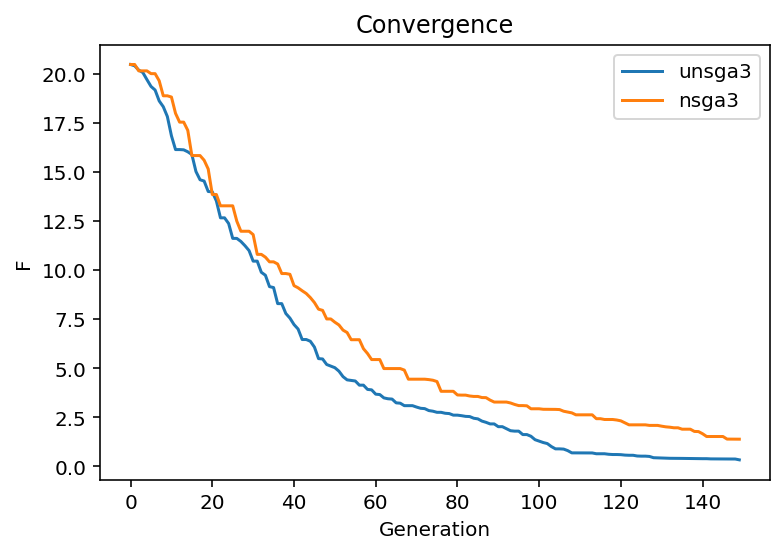

In [3]:
import numpy as np
import matplotlib.pyplot as plt

ret = [np.min(e.pop.get("F")) for e in res.history]
_ret = [np.min(e.pop.get("F")) for e in _res.history]

plt.plot(np.arange(len(ret)), ret, label="unsga3")
plt.plot(np.arange(len(_ret)), _ret, label="nsga3")
plt.title("Convergence")
plt.xlabel("Generation")
plt.ylabel("F")
plt.legend()
plt.show()

### API